In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

In [7]:
df = pd.read_csv("../data/zillow/City_time_series.csv")

In [8]:
print(df.shape)

(3762566, 81)


In [9]:
df.head(20)

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,131100.0,NaN,NaN,NaN,NaN,NaN
5,1996-04-30,abernathyhaletx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1996-04-30,abilenetaylortx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1996-04-30,abingdonharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91000.0,87600.0,123900.0,125600.0,169700.0,NaN,NaN,NaN,NaN,NaN
8,1996-04-30,abingdonknoxil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,59000.0,NaN,NaN,NaN,NaN,NaN
9,1996-04-30,abingdonwashingtonva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,89400.0,89400.0,155000.0,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762566 entries, 0 to 3762565
Data columns (total 81 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   Date                                                           object 
 1   RegionName                                                     object 
 2   InventorySeasonallyAdjusted_AllHomes                           float64
 3   InventoryRaw_AllHomes                                          float64
 4   MedianListingPricePerSqft_1Bedroom                             float64
 5   MedianListingPricePerSqft_2Bedroom                             float64
 6   MedianListingPricePerSqft_3Bedroom                             float64
 7   MedianListingPricePerSqft_4Bedroom                             float64
 8   MedianListingPricePerSqft_5BedroomOrMore                       float64
 9   MedianListingPricePerSqft_AllHomes            

In [11]:
df.isnull().sum()

Date                                          0
RegionName                                    0
InventorySeasonallyAdjusted_AllHomes    2990822
InventoryRaw_AllHomes                   2990822
MedianListingPricePerSqft_1Bedroom      3754896
                                         ...   
ZRI_AllHomes                            2664399
ZRI_AllHomesPlusMultifamily             2661716
ZriPerSqft_AllHomes                     2753169
Zri_MultiFamilyResidenceRental          3312347
Zri_SingleFamilyResidenceRental         2663647
Length: 81, dtype: int64

In [12]:
def safe_median_fill(df):
    """
    Fill missing values column by column, keeping all rows
    """
    df_filled = df.copy()
    total_rows = len(df_filled)
    
    print("🛡️ SAFE MEDIAN FILLING STRATEGY:")
    print("Preserving all 3.76 million rows...")
    
    # Fill numerical columns with median
    numerical_cols = df_filled.select_dtypes(include=[np.number]).columns
    filled_columns = 0
    
    for col in numerical_cols:
        if df_filled[col].isnull().sum() > 0:
            before_missing = df_filled[col].isnull().sum()
            median_val = df_filled[col].median()
            df_filled[col].fillna(median_val, inplace=True)
            after_missing = df_filled[col].isnull().sum()
            
            if after_missing == 0:  # Only count if successful
                filled_columns += 1
                print(f"✅ {col}: Filled {before_missing:,} values with {median_val:,.2f}")
    
    print(f"\n🎉 Filled missing values in {filled_columns} columns")
    print(f"📊 Rows preserved: {len(df_filled):,} (100% of original)")
    
    return df_filled

df_filled = safe_median_fill(df)

🛡️ SAFE MEDIAN FILLING STRATEGY:
Preserving all 3.76 million rows...


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ InventorySeasonallyAdjusted_AllHomes: Filled 2,990,822 values with 72.00
✅ InventoryRaw_AllHomes: Filled 2,990,822 values with 72.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianListingPricePerSqft_1Bedroom: Filled 3,754,896 values with 211.22
✅ MedianListingPricePerSqft_2Bedroom: Filled 3,687,992 values with 133.34


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianListingPricePerSqft_3Bedroom: Filled 3,511,933 values with 120.59
✅ MedianListingPricePerSqft_4Bedroom: Filled 3,618,383 values with 126.86


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianListingPricePerSqft_5BedroomOrMore: Filled 3,724,913 values with 140.53
✅ MedianListingPricePerSqft_AllHomes: Filled 3,210,591 values with 124.42


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianListingPricePerSqft_CondoCoop: Filled 3,707,745 values with 165.36
✅ MedianListingPricePerSqft_DuplexTriplex: Filled 3,754,982 values with 73.04


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianListingPricePerSqft_SingleFamilyResidence: Filled 3,231,136 values with 123.07
✅ MedianListingPrice_1Bedroom: Filled 3,756,072 values with 188,744.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianListingPrice_2Bedroom: Filled 3,704,829 values with 166,450.00
✅ MedianListingPrice_3Bedroom: Filled 3,553,305 values with 199,873.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianListingPrice_4Bedroom: Filled 3,642,318 values with 316,900.00
✅ MedianListingPrice_5BedroomOrMore: Filled 3,733,803 values with 420,000.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianListingPrice_AllHomes: Filled 3,330,656 values with 218,900.00
✅ MedianListingPrice_CondoCoop: Filled 3,721,433 values with 214,000.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianListingPrice_DuplexTriplex: Filled 3,754,387 values with 169,100.00
✅ MedianListingPrice_SingleFamilyResidence: Filled 3,342,441 values with 220,000.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianPctOfPriceReduction_AllHomes: Filled 3,479,030 values with 3.69
✅ MedianPctOfPriceReduction_CondoCoop: Filled 3,742,238 values with 4.08


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianPctOfPriceReduction_SingleFamilyResidence: Filled 3,501,558 values with 3.64
✅ MedianPriceCutDollar_AllHomes: Filled 3,479,030 values with 8,000.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianPriceCutDollar_CondoCoop: Filled 3,742,238 values with 8,000.00
✅ MedianPriceCutDollar_SingleFamilyResidence: Filled 3,501,558 values with 8,000.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPricePerSqft_1Bedroom: Filled 3,747,210 values with 1.57
✅ MedianRentalPricePerSqft_2Bedroom: Filled 3,731,337 values with 1.22


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPricePerSqft_3Bedroom: Filled 3,727,699 values with 0.92
✅ MedianRentalPricePerSqft_4Bedroom: Filled 3,752,672 values with 0.82


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPricePerSqft_5BedroomOrMore: Filled 3,761,398 values with 0.74
✅ MedianRentalPricePerSqft_AllHomes: Filled 3,687,166 values with 0.94


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPricePerSqft_CondoCoop: Filled 3,746,738 values with 1.41
✅ MedianRentalPricePerSqft_DuplexTriplex: Filled 3,756,962 values with 1.20


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits: Filled 3,719,506 values with 1.28
✅ MedianRentalPricePerSqft_SingleFamilyResidence: Filled 3,700,386 values with 0.87


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPricePerSqft_Studio: Filled 3,745,692 values with 0.88
✅ MedianRentalPrice_1Bedroom: Filled 3,745,414 values with 1,156.75


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPrice_2Bedroom: Filled 3,729,415 values with 1,270.00
✅ MedianRentalPrice_3Bedroom: Filled 3,726,577 values with 1,395.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPrice_4Bedroom: Filled 3,752,425 values with 1,800.00
✅ MedianRentalPrice_5BedroomOrMore: Filled 3,761,440 values with 2,275.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPrice_AllHomes: Filled 3,692,071 values with 1,400.00
✅ MedianRentalPrice_CondoCoop: Filled 3,747,622 values with 1,500.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPrice_DuplexTriplex: Filled 3,753,260 values with 1,095.00
✅ MedianRentalPrice_MultiFamilyResidence5PlusUnits: Filled 3,712,333 values with 1,250.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ MedianRentalPrice_SingleFamilyResidence: Filled 3,703,512 values with 1,400.00
✅ MedianRentalPrice_Studio: Filled 3,744,853 values with 1,322.50


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ ZHVIPerSqft_AllHomes: Filled 809,121 values with 93.00
✅ PctOfHomesDecreasingInValues_AllHomes: Filled 1,408,159 values with 29.65


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ PctOfHomesIncreasingInValues_AllHomes: Filled 1,408,159 values with 60.11
✅ PctOfHomesSellingForGain_AllHomes: Filled 3,762,365 values with 92.34


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ PctOfHomesSellingForLoss_AllHomes: Filled 3,762,365 values with 7.66
✅ PctOfListingsWithPriceReductionsSeasAdj_AllHomes: Filled 3,402,646 values with 12.83


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ PctOfListingsWithPriceReductionsSeasAdj_CondoCoop: Filled 3,731,062 values with 11.06
✅ PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence: Filled 3,429,926 values with 13.04


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ PctOfListingsWithPriceReductions_AllHomes: Filled 3,402,646 values with 12.68
✅ PctOfListingsWithPriceReductions_CondoCoop: Filled 3,731,062 values with 10.92


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ PctOfListingsWithPriceReductions_SingleFamilyResidence: Filled 3,429,926 values with 12.90
✅ PriceToRentRatio_AllHomes: Filled 2,679,691 values with 10.50


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ Sale_Counts: Filled 3,029,244 values with 9.00
✅ Sale_Counts_Seas_Adj: Filled 3,050,925 values with 10.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ Sale_Prices: Filled 3,615,276 values with 235,400.00
✅ ZHVI_1bedroom: Filled 3,440,591 values with 116,300.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ ZHVI_2bedroom: Filled 1,997,958 values with 118,800.00
✅ ZHVI_3bedroom: Filled 1,221,931 values with 146,100.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ ZHVI_4bedroom: Filled 1,814,686 values with 213,100.00
✅ ZHVI_5BedroomOrMore: Filled 2,937,241 values with 324,200.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ ZHVI_AllHomes: Filled 679,176 values with 142,500.00
✅ ZHVI_BottomTier: Filled 1,163,169 values with 110,900.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ ZHVI_CondoCoop: Filled 2,938,992 values with 147,100.00
✅ ZHVI_MiddleTier: Filled 685,018 values with 142,600.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ ZHVI_SingleFamilyResidence: Filled 687,235 values with 144,400.00
✅ ZHVI_TopTier: Filled 646,807 values with 206,800.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ ZRI_AllHomes: Filled 2,664,399 values with 1,227.00
✅ ZRI_AllHomesPlusMultifamily: Filled 2,661,716 values with 1,222.00


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)
C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

✅ ZriPerSqft_AllHomes: Filled 2,753,169 values with 0.83
✅ Zri_MultiFamilyResidenceRental: Filled 3,312,347 values with 1,220.00
✅ Zri_SingleFamilyResidenceRental: Filled 2,663,647 values with 1,231.00

🎉 Filled missing values in 79 columns
📊 Rows preserved: 3,762,566 (100% of original)


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_22772\2017547221.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(median_val, inplace=True)


In [14]:
df_filled.shape

(3762566, 81)

In [15]:
df_filled.isnull().sum()

Date                                    0
RegionName                              0
InventorySeasonallyAdjusted_AllHomes    0
InventoryRaw_AllHomes                   0
MedianListingPricePerSqft_1Bedroom      0
                                       ..
ZRI_AllHomes                            0
ZRI_AllHomesPlusMultifamily             0
ZriPerSqft_AllHomes                     0
Zri_MultiFamilyResidenceRental          0
Zri_SingleFamilyResidenceRental         0
Length: 81, dtype: int64

In [16]:
print("🔍 CHECKING FOR DUPLICATES...")

# Check for completely identical rows (all columns same)
total_duplicates = df_filled.duplicated().sum()
print(f"Complete duplicate rows: {total_duplicates:,}")

# Check for duplicates based on key columns (more important for real estate)
key_columns = ['Date', 'RegionName']  # These should be unique combinations
if all(col in df_filled.columns for col in key_columns):
    key_duplicates = df_filled.duplicated(subset=key_columns).sum()
    print(f"Duplicates based on Date + RegionName: {key_duplicates:,}")

# Check partial duplicates (some columns same)
print("\n📊 DUPLICATE ANALYSIS:")
print(f"Total rows: {len(df_filled):,}")
print(f"Total duplicate rows: {total_duplicates:,} ({total_duplicates/len(df_filled)*100:.2f}%)")

🔍 CHECKING FOR DUPLICATES...
Complete duplicate rows: 0
Duplicates based on Date + RegionName: 0

📊 DUPLICATE ANALYSIS:
Total rows: 3,762,566
Total duplicate rows: 0 (0.00%)


In [17]:
df_filled.head(10)

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,72.0,72.0,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,...,110900.0,147100.0,142600.0,144400.0,108700.0,1227.0,1222.0,0.832,1220.0,1231.0
1,1996-04-30,aberdeenbinghamid,72.0,72.0,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,...,110900.0,147100.0,142600.0,144400.0,168400.0,1227.0,1222.0,0.832,1220.0,1231.0
2,1996-04-30,aberdeenharfordmd,72.0,72.0,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,...,81300.0,137900.0,109600.0,108600.0,147900.0,1227.0,1222.0,0.832,1220.0,1231.0
3,1996-04-30,aberdeenmonroems,72.0,72.0,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,...,110900.0,147100.0,142600.0,144400.0,74500.0,1227.0,1222.0,0.832,1220.0,1231.0
4,1996-04-30,aberdeenmoorenc,72.0,72.0,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,...,110900.0,147100.0,142600.0,144400.0,131100.0,1227.0,1222.0,0.832,1220.0,1231.0
5,1996-04-30,abernathyhaletx,72.0,72.0,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,...,110900.0,147100.0,142600.0,144400.0,206800.0,1227.0,1222.0,0.832,1220.0,1231.0
6,1996-04-30,abilenetaylortx,72.0,72.0,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,...,110900.0,147100.0,142600.0,144400.0,206800.0,1227.0,1222.0,0.832,1220.0,1231.0
7,1996-04-30,abingdonharfordmd,72.0,72.0,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,...,91000.0,87600.0,123900.0,125600.0,169700.0,1227.0,1222.0,0.832,1220.0,1231.0
8,1996-04-30,abingdonknoxil,72.0,72.0,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,...,110900.0,147100.0,142600.0,144400.0,59000.0,1227.0,1222.0,0.832,1220.0,1231.0
9,1996-04-30,abingdonwashingtonva,72.0,72.0,211.220755,133.341651,120.592248,126.864068,140.528604,124.423276,...,110900.0,147100.0,89400.0,89400.0,155000.0,1227.0,1222.0,0.832,1220.0,1231.0


In [18]:
df_filled.columns

Index(['Date', 'RegionName', 'InventorySeasonallyAdjusted_AllHomes',
       'InventoryRaw_AllHomes', 'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'MedianPctOfPriceReduction_SingleFamily

In [24]:
# =============================================================================
# BLOCK 1: SMART FEATURE SELECTION FOR REALTYAI
# =============================================================================

#import pandas as pd
#import numpy as np

# Load your Zillow data (with median-filled missing values)
#df = pd.read_csv('../data/zillow/City_time_series.csv')

#print("🎯 SELECTING KEY FEATURES FOR REALTYAI PLATFORM...")

# Based on your project goals, select the most relevant columns
key_columns = [
    # Core identifiers
    'Date', 'RegionName',
    
    # PRIMARY TARGET VARIABLE (for price prediction)
    'MedianListingPrice_AllHomes',
    
    # Key price indicators (for feature engineering)
    'MedianListingPrice_3Bedroom',  # Most common house size
    'ZHVI_AllHomes',                # Market value index
    'Sale_Prices',                  # Actual transaction prices
    
    # Rental market indicators
    'MedianRentalPrice_AllHomes',
    'PriceToRentRatio_AllHomes',    # Investment metric
    
    # Market trends & liquidity
    'Sale_Counts',                  # Transaction volume
    'PctOfHomesIncreasingInValues_AllHomes',  # Market direction
    'PctOfListingsWithPriceReductions_AllHomes',  # Market pressure
    
    # Property type indicators
    'ZHVI_SingleFamilyResidence',
    'ZHVI_CondoCoop',
    
    # Market segments
    'ZHVI_BottomTier',
    'ZHVI_MiddleTier', 
    'ZHVI_TopTier'
]

# Create focused dataset
df_focused = df_filled[key_columns].copy()

print(f"✅ FOCUSED DATASET CREATED: {df_focused.shape}")
print(f"Reduced from {len(df.columns)} to {len(df_focused.columns)} columns")

✅ FOCUSED DATASET CREATED: (3762566, 16)
Reduced from 81 to 16 columns


In [25]:
# =============================================================================
# BLOCK 2: TIME SERIES DATA PREPARATION
# =============================================================================

print("\n🕒 PREPARING TIME SERIES DATA...")

# Convert Date to datetime
df_focused['Date'] = pd.to_datetime(df_focused['Date'])

# Sort by Region and Date (CRITICAL for time series)
df_focused = df_focused.sort_values(['RegionName', 'Date'])

# Extract time components
df_focused['Year'] = df_focused['Date'].dt.year
df_focused['Month'] = df_focused['Date'].dt.month
df_focused['Quarter'] = df_focused['Date'].dt.quarter

# Create seasonal features
df_focused['Season'] = df_focused['Month'] % 12 // 3 + 1
df_focused['Is_Spring'] = (df_focused['Month'].isin([3, 4, 5])).astype(int)
df_focused['Is_Summer'] = (df_focused['Month'].isin([6, 7, 8])).astype(int)

print("✅ Time features created")

# Display time series info
print(f"\n📅 TIME SERIES INFO:")
print(f"Date range: {df_focused['Date'].min()} to {df_focused['Date'].max()}")
print(f"Total regions: {df_focused['RegionName'].nunique()}")
print(f"Total time periods: {df_focused['Date'].nunique()}")
print(f"New shape: {df_focused.shape}")


🕒 PREPARING TIME SERIES DATA...
✅ Time features created

📅 TIME SERIES INFO:
Date range: 1996-04-30 00:00:00 to 2017-12-31 00:00:00
Total regions: 16636
Total time periods: 261
New shape: (3762566, 22)


In [26]:
# =============================================================================
# BLOCK 3: DATA VALIDATION & SAVING
# =============================================================================

print("\n🔍 FINAL DATA VALIDATION:")

# Check for any remaining issues
print(f"Final dataset shape: {df_focused.shape}")
print(f"Missing values: {df_focused.isnull().sum().sum()}")
print(f"Duplicate rows: {df_focused.duplicated().sum()}")

# Check data distribution
print(f"\n📈 TARGET VARIABLE STATS (MedianListingPrice_AllHomes):")
print(f"Min: ${df_focused['MedianListingPrice_AllHomes'].min():,}")
print(f"Max: ${df_focused['MedianListingPrice_AllHomes'].max():,}")
print(f"Mean: ${df_focused['MedianListingPrice_AllHomes'].mean():,}")
print(f"Median: ${df_focused['MedianListingPrice_AllHomes'].median():,}")

# Final verification
print(f"\n✅ CRITICAL COLUMNS VERIFICATION:")
print(f"Date column present: {'Date' in df_focused.columns}")
print(f"RegionName present: {'RegionName' in df_focused.columns}") 
print(f"Target variable present: {'MedianListingPrice_AllHomes' in df_focused.columns}")
print(f"Time series ready: {df_focused['Date'].dtype == 'datetime64[ns]'}")

# Save the cleaned, focused dataset
df_focused.to_csv('../data/zillow/zillow_cleaned_focused.csv', index=False)

print("\n💾 CLEANED DATASET SAVED!")
print("✅ ZILLOW DATA CLEANING COMPLETED! 🎉")


🔍 FINAL DATA VALIDATION:
Final dataset shape: (3762566, 22)
Missing values: 0
Duplicate rows: 0

📈 TARGET VARIABLE STATS (MedianListingPrice_AllHomes):
Min: $25,000.0
Max: $6,199,500.0
Mean: $225,251.00280167843
Median: $218,900.0

✅ CRITICAL COLUMNS VERIFICATION:
Date column present: True
RegionName present: True
Target variable present: True
Time series ready: True

💾 CLEANED DATASET SAVED!
✅ ZILLOW DATA CLEANING COMPLETED! 🎉


In [27]:
# =============================================================================
# LOAD CLEANED DATA AND START PREPROCESSING
# =============================================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your cleaned Zillow data
df_clean = pd.read_csv('../data/zillow/zillow_cleaned_focused.csv')

print("📊 LOADED CLEANED DATA:")
print(f"Shape: {df_clean.shape}")
print(f"Columns: {df_clean.columns.tolist()}")

# Convert Date back to datetime (important for time series)
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Sort by Region and Date (critical for time series features)
df_clean = df_clean.sort_values(['RegionName', 'Date'])

📊 LOADED CLEANED DATA:
Shape: (3762566, 22)
Columns: ['Date', 'RegionName', 'MedianListingPrice_AllHomes', 'MedianListingPrice_3Bedroom', 'ZHVI_AllHomes', 'Sale_Prices', 'MedianRentalPrice_AllHomes', 'PriceToRentRatio_AllHomes', 'Sale_Counts', 'PctOfHomesIncreasingInValues_AllHomes', 'PctOfListingsWithPriceReductions_AllHomes', 'ZHVI_SingleFamilyResidence', 'ZHVI_CondoCoop', 'ZHVI_BottomTier', 'ZHVI_MiddleTier', 'ZHVI_TopTier', 'Year', 'Month', 'Quarter', 'Season', 'Is_Spring', 'Is_Summer']


In [29]:
# =============================================================================
# CREATE TIME SERIES FEATURES
# =============================================================================

print("📈 CREATING TIME SERIES FEATURES...")

# Create lag features (previous time periods)
lag_periods = [1, 3, 6, 12]  # 1 month, 3 months, 6 months, 1 year

for lag in lag_periods:
    df_clean[f'Price_Lag_{lag}'] = df_clean.groupby('RegionName')['MedianListingPrice_AllHomes'].shift(lag)
    df_clean[f'ZHVI_Lag_{lag}'] = df_clean.groupby('RegionName')['ZHVI_AllHomes'].shift(lag)

# Create rolling averages (trend features)
df_clean['Price_Rolling_Mean_3'] = df_clean.groupby('RegionName')['MedianListingPrice_AllHomes'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)
df_clean['Price_Rolling_Mean_12'] = df_clean.groupby('RegionName')['MedianListingPrice_AllHomes'].transform(
    lambda x: x.rolling(window=12, min_periods=1).mean()
)

# Price change features
df_clean['Price_MoM_Change'] = df_clean.groupby('RegionName')['MedianListingPrice_AllHomes'].pct_change(1)
df_clean['Price_YoY_Change'] = df_clean.groupby('RegionName')['MedianListingPrice_AllHomes'].pct_change(12)

print("✅ Time series features created")
print(f"New shape: {df_clean.shape}")

📈 CREATING TIME SERIES FEATURES...
✅ Time series features created
New shape: (3762566, 34)


In [30]:
# =============================================================================
# STEP 3: HANDLE MISSING VALUES FROM LAG FEATURES
# =============================================================================

print("🧹 HANDLING MISSING VALUES FROM LAG FEATURES...")

# Check missing values after creating lag features
missing_before = df_clean.isnull().sum().sum()
print(f"Missing values before cleaning: {missing_before}")

# Remove rows with NaN values (from lag operations)
df_clean = df_clean.dropna()

print(f"Missing values after cleaning: {df_clean.isnull().sum().sum()}")
print(f"New shape: {df_clean.shape}")

🧹 HANDLING MISSING VALUES FROM LAG FEATURES...
Missing values before cleaning: 947914
Missing values after cleaning: 0
New shape: (3563030, 34)


In [31]:
# =============================================================================
# STEP 4: ENCODE CATEGORICAL VARIABLES
# =============================================================================

print("🔤 ENCODING CATEGORICAL VARIABLES...")

# Label encode RegionName (convert text to numbers)
le = LabelEncoder()
df_clean['RegionName_Encoded'] = le.fit_transform(df_clean['RegionName'])

print(f"Encoded {df_clean['RegionName'].nunique()} unique regions")
print(f"New shape: {df_clean.shape}")

🔤 ENCODING CATEGORICAL VARIABLES...
Encoded 16593 unique regions
New shape: (3563030, 35)


In [33]:
# =============================================================================
# STEP 5: PREPARE FEATURES FOR MODELING
# =============================================================================

print("🎯 PREPARING FEATURES FOR MODELING...")

# Separate features from target and identifiers
exclude_cols = ['Date', 'RegionName', 'MedianListingPrice_AllHomes']
feature_columns = [col for col in df_clean.columns if col not in exclude_cols]

X = df_clean[feature_columns]
y = df_clean['MedianListingPrice_AllHomes']

print(f"Feature matrix (X) shape: {X.shape}")
print(f"Target vector (y) shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")

🎯 PREPARING FEATURES FOR MODELING...
Feature matrix (X) shape: (3563030, 32)
Target vector (y) shape: (3563030,)
Number of features: 32


In [34]:
# =============================================================================
# STEP 6: SAVE PREPROCESSED DATA
# =============================================================================

print("💾 SAVING PREPROCESSED DATA...")

# Save the fully preprocessed dataset
df_clean.to_csv('../data/zillow/zillow_preprocessed.csv', index=False)

# Save features and target separately for modeling
X.to_csv('../data/zillow/zillow_X_preprocessed.csv', index=False)
y.to_csv('../data/zillow/zillow_y_preprocessed.csv', index=False)

print("✅ ZILLOW DATA PREPROCESSING COMPLETED! 🎉")
print(f"Final dataset shape: {df_clean.shape}")
print(f"Features ready for: Price Prediction (Week 5) & Time Series Forecasting (Week 6)")
print(f"📁 Files saved:")
print(f"   - zillow_preprocessed.csv (Complete data)")
print(f"   - zillow_X_preprocessed.csv (32 features/clues)")
print(f"   - zillow_y_preprocessed.csv (House prices/answers)")

💾 SAVING PREPROCESSED DATA...
✅ ZILLOW DATA PREPROCESSING COMPLETED! 🎉
Final dataset shape: (3563030, 35)
Features ready for: Price Prediction (Week 5) & Time Series Forecasting (Week 6)
📁 Files saved:
   - zillow_preprocessed.csv (Complete data)
   - zillow_X_preprocessed.csv (32 features/clues)
   - zillow_y_preprocessed.csv (House prices/answers)


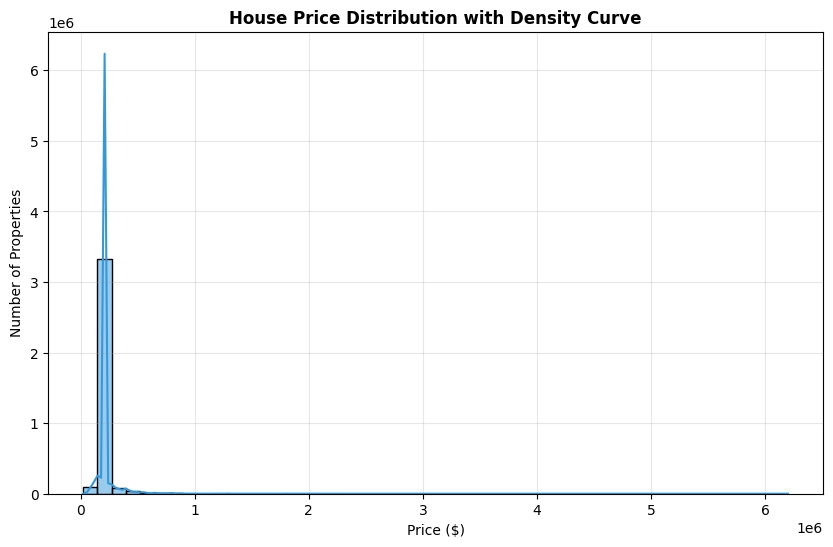

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['MedianListingPrice_AllHomes'], bins=50, kde=True, color='#3498db')
plt.title('House Price Distribution with Density Curve', fontweight='bold')
plt.xlabel('Price ($)')
plt.ylabel('Number of Properties')
plt.grid(True, alpha=0.3)
plt.show()

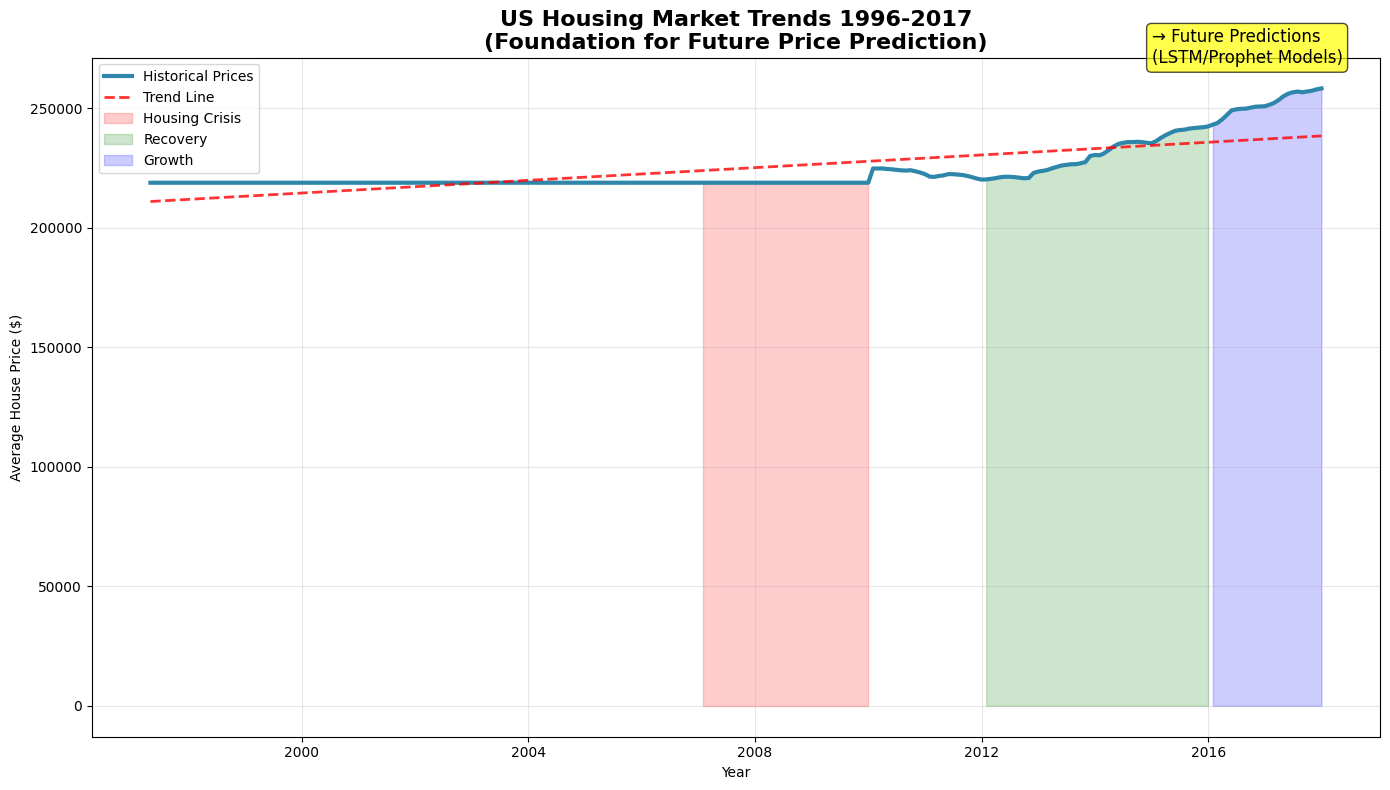

🔮 PREDICTION INSIGHTS:
• Clear upward trend despite 2008 crisis
• Strong recovery and growth post-2012
• Pattern suggests continued growth potential
• Ready for LSTM/Prophet time series forecasting


In [38]:
# =============================================================================
# GRAPH FOR PREDICTING FUTURE PRICES
# =============================================================================

plt.figure(figsize=(14, 8))

# Calculate national average prices over time
national_avg = df_clean.groupby('Date')['MedianListingPrice_AllHomes'].mean()

# Plot the trend line
plt.plot(national_avg.index, national_avg.values, linewidth=3, color='#2E86AB', label='Historical Prices')

# Add trend line (for prediction context)
z = np.polyfit(range(len(national_avg)), national_avg.values, 1)
p = np.poly1d(z)
plt.plot(national_avg.index, p(range(len(national_avg))), 'r--', alpha=0.8, 
         label='Trend Line', linewidth=2)

# Highlight different market phases
crisis_period = (national_avg.index >= pd.Timestamp('2007-01-01')) & (national_avg.index <= pd.Timestamp('2009-12-31'))
recovery_period = (national_avg.index >= pd.Timestamp('2012-01-01')) & (national_avg.index <= pd.Timestamp('2015-12-31'))
growth_period = (national_avg.index >= pd.Timestamp('2016-01-01'))

plt.fill_between(national_avg.index, national_avg.values, alpha=0.2, color='red', where=crisis_period, label='Housing Crisis')
plt.fill_between(national_avg.index, national_avg.values, alpha=0.2, color='green', where=recovery_period, label='Recovery')
plt.fill_between(national_avg.index, national_avg.values, alpha=0.2, color='blue', where=growth_period, label='Growth')

plt.title('US Housing Market Trends 1996-2017\n(Foundation for Future Price Prediction)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average House Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add prediction context
plt.text(pd.Timestamp('2015-01-01'), national_avg.min() + 50000, 
         '→ Future Predictions\n(LSTM/Prophet Models)', 
         fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

print("🔮 PREDICTION INSIGHTS:")
print("• Clear upward trend despite 2008 crisis")
print("• Strong recovery and growth post-2012")
print("• Pattern suggests continued growth potential")
print("• Ready for LSTM/Prophet time series forecasting")

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# First, load your Zillow data
df_clean = pd.read_csv('../data/zillow/zillow_cleaned_focused.csv')  # or whatever your main file is

# Convert Date column to datetime if needed
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


In [25]:
df_clean.columns.value_counts()


Date                                         1
RegionName                                   1
MedianListingPrice_AllHomes                  1
MedianListingPrice_3Bedroom                  1
ZHVI_AllHomes                                1
Sale_Prices                                  1
MedianRentalPrice_AllHomes                   1
PriceToRentRatio_AllHomes                    1
Sale_Counts                                  1
PctOfHomesIncreasingInValues_AllHomes        1
PctOfListingsWithPriceReductions_AllHomes    1
ZHVI_SingleFamilyResidence                   1
ZHVI_CondoCoop                               1
ZHVI_BottomTier                              1
ZHVI_MiddleTier                              1
ZHVI_TopTier                                 1
Year                                         1
Month                                        1
Quarter                                      1
Season                                       1
Is_Spring                                    1
Is_Summer    

In [34]:
df_clean.info

<bound method DataFrame.info of               Date            RegionName  MedianListingPrice_AllHomes  \
0       2010-01-31  abbevilleabbevillesc                     218900.0   
1       2010-02-28  abbevilleabbevillesc                     218900.0   
2       2010-03-31  abbevilleabbevillesc                     218900.0   
3       2010-04-30  abbevilleabbevillesc                     218900.0   
4       2010-05-31  abbevilleabbevillesc                     218900.0   
...            ...                   ...                          ...   
3762561 2017-08-31   zuniisle_of_wightva                     218900.0   
3762562 2017-09-30   zuniisle_of_wightva                     218900.0   
3762563 2017-10-31   zuniisle_of_wightva                     218900.0   
3762564 2017-11-30   zuniisle_of_wightva                     218900.0   
3762565 2017-12-31   zuniisle_of_wightva                     218900.0   

         MedianListingPrice_3Bedroom  ZHVI_AllHomes  Sale_Prices  \
0                      

City counts statistics:
Total unique cities: 16636
Min listings: 1
Max listings: 261
Average listings: 226.2


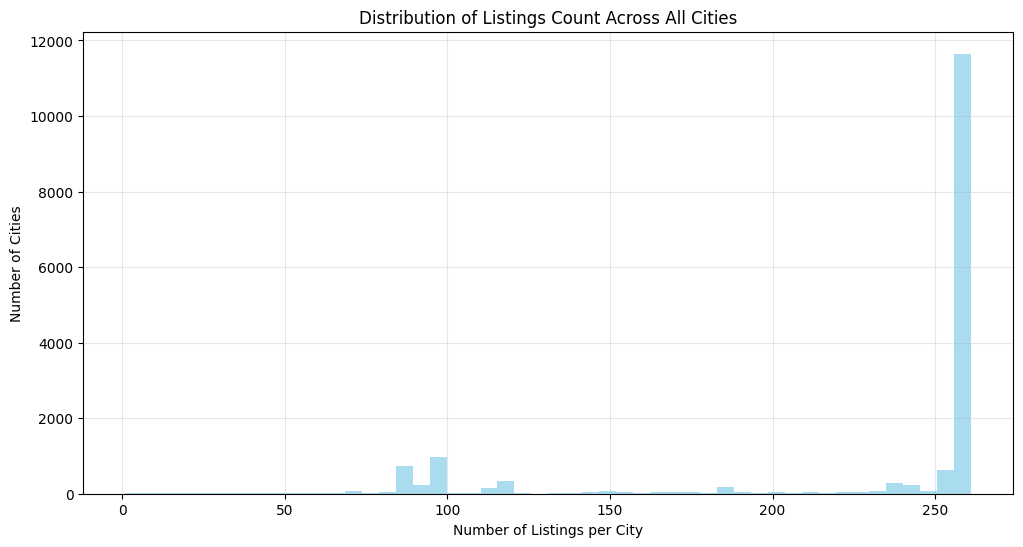

🔍 INTERPRETATION:
• If bars are clustered at one value → standardized data collection
• If spread out → natural variation in market sizes
• Equal counts suggest systematic data reporting


In [11]:
# Check the actual distribution
city_counts = df_clean['RegionName'].value_counts()
print("City counts statistics:")
print(f"Total unique cities: {len(city_counts)}")
print(f"Min listings: {city_counts.min()}")
print(f"Max listings: {city_counts.max()}")
print(f"Average listings: {city_counts.mean():.1f}")

# Plot the full distribution
plt.figure(figsize=(12, 6))
city_counts.hist(bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Listings Count Across All Cities')
plt.xlabel('Number of Listings per City')
plt.ylabel('Number of Cities')
plt.grid(alpha=0.3)
plt.show()

print("🔍 INTERPRETATION:")
print("• If bars are clustered at one value → standardized data collection")
print("• If spread out → natural variation in market sizes")
print("• Equal counts suggest systematic data reporting")

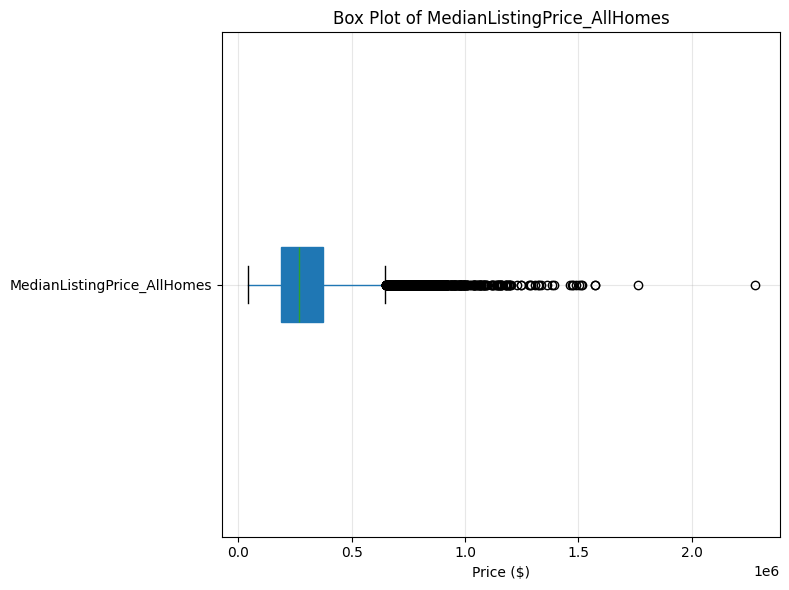

In [15]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas if you haven't already

# 1. Define the column you want to plot
price_column = 'MedianListingPrice_AllHomes' 

# 2. Create the figure and plot
plt.figure(figsize=(8, 6))

# Use your actual df_clean DataFrame here!
# NOTE: If your df_clean has a lot of rows and you get a memory error, 
# you might want to sample it first, but typically for a boxplot, it's fine.
df_clean.boxplot(column=[price_column], vert=False, patch_artist=True)

# 3. Add labels and title
plt.title(f'Box Plot of {price_column}')
plt.xlabel('Price ($)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Price columns available: ['MedianListingPrice_AllHomes', 'MedianListingPrice_3Bedroom', 'Sale_Prices', 'MedianRentalPrice_AllHomes', 'PriceToRentRatio_AllHomes', 'PctOfListingsWithPriceReductions_AllHomes']


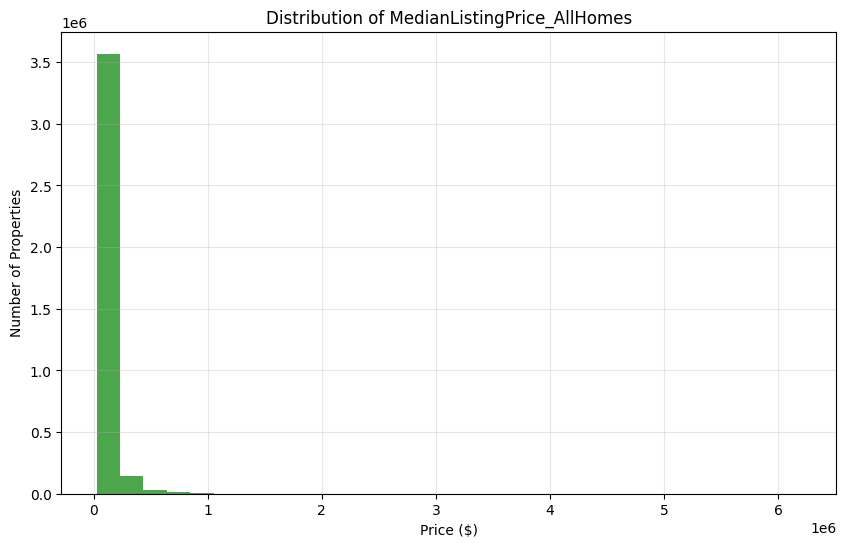

In [26]:

price_columns = [col for col in df_clean.columns if 'price' in col.lower() or 'Price' in col]
print(f"Price columns available: {price_columns}")

if price_columns:
    price_col = price_columns[0]
    plt.figure(figsize=(10, 6))
    df_clean[price_col].hist(bins=30, alpha=0.7, color='green')
    plt.title(f'Distribution of {price_col}')
    plt.xlabel('Price ($)')
    plt.ylabel('Number of Properties')
    plt.grid(alpha=0.3)
    plt.show()

Price columns available: ['MedianListingPrice_AllHomes', 'MedianListingPrice_3Bedroom', 'Sale_Prices', 'MedianRentalPrice_AllHomes', 'PriceToRentRatio_AllHomes', 'PctOfListingsWithPriceReductions_AllHomes']


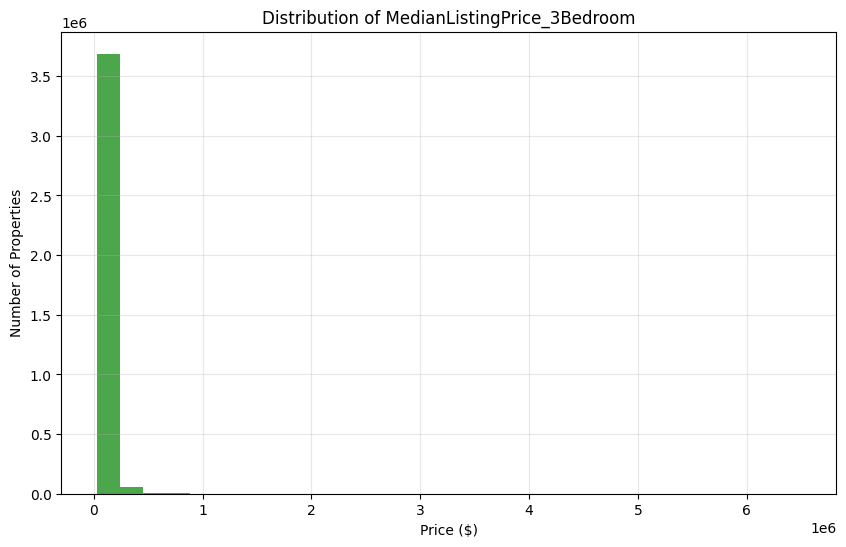

In [27]:

price_columns = [col for col in df_clean.columns if 'price' in col.lower() or 'Price' in col]
print(f"Price columns available: {price_columns}")

if price_columns:
    price_col = price_columns[1]
    plt.figure(figsize=(10, 6))
    df_clean[price_col].hist(bins=30, alpha=0.7, color='green')
    plt.title(f'Distribution of {price_col}')
    plt.xlabel('Price ($)')
    plt.ylabel('Number of Properties')
    plt.grid(alpha=0.3)
    plt.show()

Price columns available: ['MedianListingPrice_AllHomes', 'MedianListingPrice_3Bedroom', 'Sale_Prices', 'MedianRentalPrice_AllHomes', 'PriceToRentRatio_AllHomes', 'PctOfListingsWithPriceReductions_AllHomes']


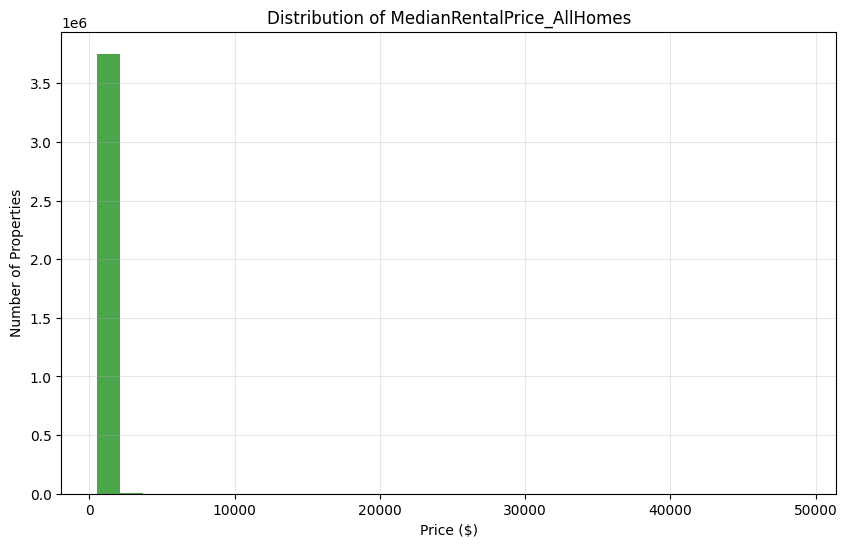

In [30]:

price_columns = [col for col in df_clean.columns if 'price' in col.lower() or 'Price' in col]
print(f"Price columns available: {price_columns}")

if price_columns:
    price_col = price_columns[3]
    plt.figure(figsize=(10, 6))
    df_clean[price_col].hist(bins=30, alpha=0.7, color='green')
    plt.title(f'Distribution of {price_col}')
    plt.xlabel('Price ($)')
    plt.ylabel('Number of Properties')
    plt.grid(alpha=0.3)
    plt.show()

Price columns available: ['MedianListingPrice_AllHomes', 'MedianListingPrice_3Bedroom', 'Sale_Prices', 'MedianRentalPrice_AllHomes', 'PriceToRentRatio_AllHomes', 'PctOfListingsWithPriceReductions_AllHomes']


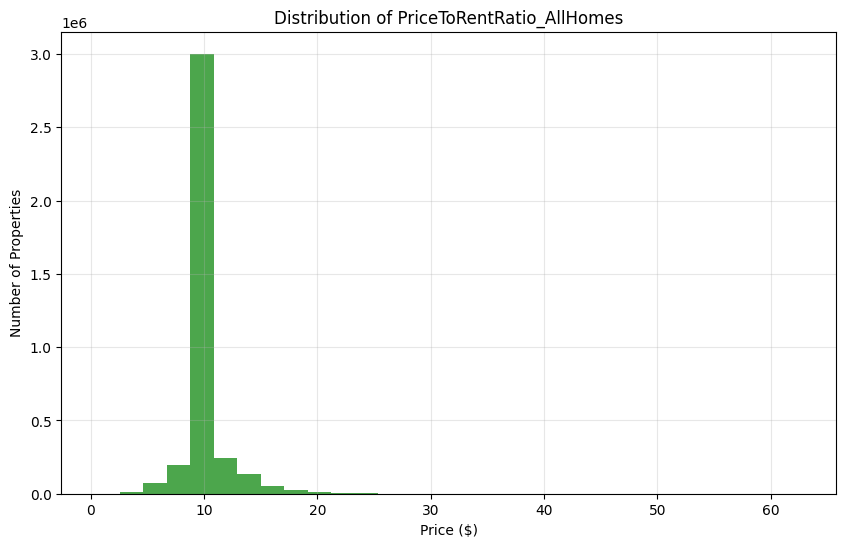

In [31]:

price_columns = [col for col in df_clean.columns if 'price' in col.lower() or 'Price' in col]
print(f"Price columns available: {price_columns}")

if price_columns:
    price_col = price_columns[4]
    plt.figure(figsize=(10, 6))
    df_clean[price_col].hist(bins=30, alpha=0.7, color='green')
    plt.title(f'Distribution of {price_col}')
    plt.xlabel('Price ($)')
    plt.ylabel('Number of Properties')
    plt.grid(alpha=0.3)
    plt.show()

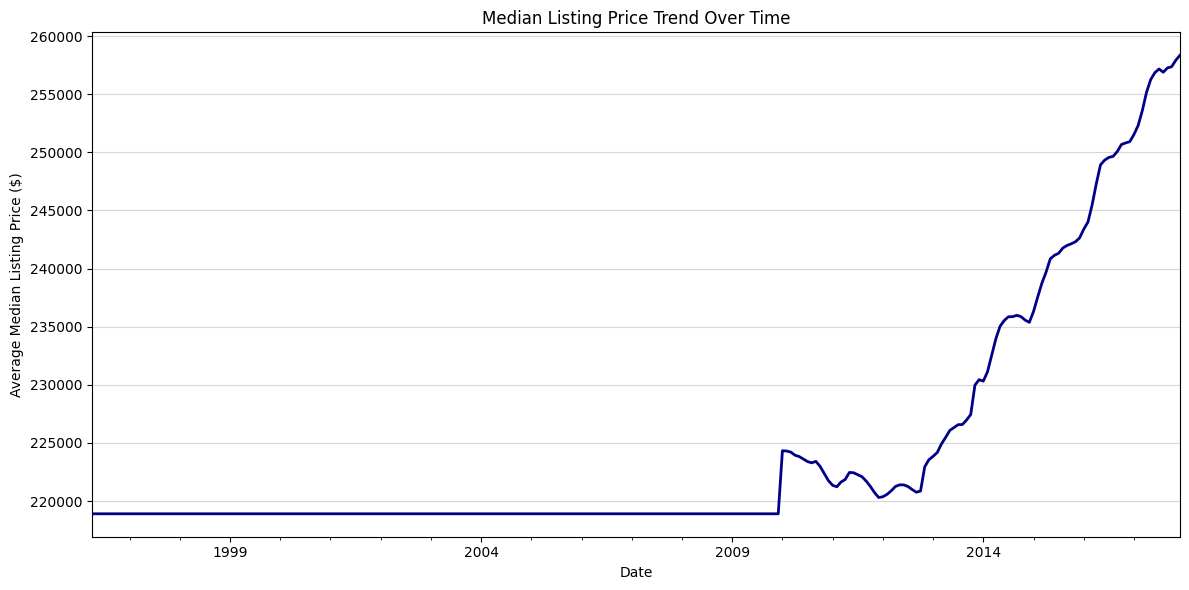

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_clean['Date'] = pd.to_datetime(df_clean['Date'])

season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
df_clean['Season_Name'] = df_clean['Season'].map(season_map)
season_order = ['Winter', 'Spring', 'Summer', 'Autumn'] # Define order for plotting

trend_data = df_clean.groupby('Date')['MedianListingPrice_AllHomes'].mean()

plt.figure(figsize=(12, 6))
trend_data.plot(kind='line', color='darkblue', linewidth=2)
plt.title('Median Listing Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Median Listing Price ($)')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig('Median_Price_Trend.png')
plt.show()

